## Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn import preprocessing
from sklearn import metrics
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
#Over Sampling and under sampling libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore");

## Insert Data

In [2]:
df = pd.read_csv("180_inj_cyc_e114_deneme.csv")

In [3]:
df.head()

,Unnamed: 0,date,tmpMoldZone25,timCool1,tmpBarrel2Zone3,tmpMoldZone3,tmpBarrel2Zone4,tmpFlange1,tmpMoldZone4,tmpBarrel2Zone1,...,sfc,frcClamp,timPlasticisation1,timPlasticisation2,reason,prsInjectionHyd1,prsTransferHyd1,strCushion1,strPlasticisation1,strTransfer1
0,21690,2021-01-18T23:28:17.000,241.0,40.06,238.5,264.6,238.3,251.2,264.9,248.0,...,[],7149.8,7.24,37.25,[],NaN,NaN,NaN,NaN,NaN
1,28917,2021-02-09T14:31:52.000,241.1,42.53,230.1,260.8,230.0,249.8,261.0,240.0,...,[],7915.0,6.17,23.86,[],NaN,NaN,NaN,NaN,NaN
2,28918,2021-02-09T14:36:04.000,241.0,42.55,230.2,260.8,229.9,250.8,260.9,240.1,...,[],7947.1,6.17,23.99,[],NaN,NaN,NaN,NaN,NaN
3,28919,2021-02-09T14:27:43.000,241.0,42.55,230.2,260.9,230.1,251.0,261.0,240.1,...,[],7927.9,6.09,24.02,[],NaN,NaN,NaN,NaN,NaN
4,28920,2021-02-09T14:30:31.000,241.0,42.55,230.0,260.9,230.1,252.6,261.0,240.0,...,[],7943.8,6.18,24.03,[],NaN,NaN,NaN,NaN,NaN


## Convert reason(injection defect) data to 0(OK) and 1 (NOK)

In [4]:
df['reason'] = df['reason'].replace(['[]'],0)
df['reason'][df['reason'] != 0] = 1
df = df.astype({"reason": int})

In [5]:
df.columns

Index(['Unnamed: 0', 'date', 'tmpMoldZone25', 'timCool1', 'tmpBarrel2Zone3',
       'tmpMoldZone3', 'tmpBarrel2Zone4', 'tmpFlange1', 'tmpMoldZone4',
       'tmpBarrel2Zone1', 'tmpFlange2', 'tmpMoldZone1', 'volCushion1',
       'tmpBarrel2Zone2', 'tmpMoldZone2', 'volCushion2', 'prsBackSpec2',
       'prsBackSpec1', 'spdInjection1', 'tmpMoldZone9', 'spdInjection2',
       'tmpMoldZone7', 'tmpMoldZone8', 'tmpOil', 'tmpMoldZone5',
       'tmpMoldZone6', 'tmpMoldZone19', 'cntCycle', 'tmpMoldZone18',
       'volTransfer2', 'stsMachine', 'tmpMoldZone15', 'volTransfer1',
       'tmpMoldZone14', 'tmpMoldZone17', 'tmpMoldZone16', 'timTransfer2',
       'timTransfer1', 'velPlasticisation2', 'velPlasticisation1',
       'timMoldClose', 'tmpBarrel1Zone5', 'tmpMoldZone22', 'tmpBarrel1Zone4',
       'tmpMoldZone21', 'tmpMoldZone24', 'tmpBarrel1Zone6', 'tmpMoldZone23',
       'prsPomp1', 'tmpBarrel1Zone1', 'prsPomp2', 'tmpBarrel1Zone3',
       'tmpMoldZone20', 'tmpBarrel1Zone2', 'volShot1', 'volPlasti

## Check null data

<AxesSubplot:>

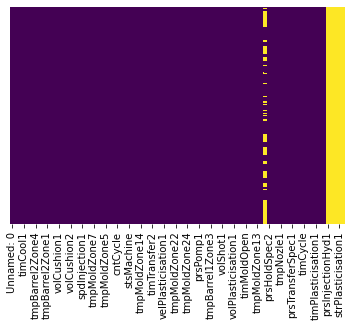

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
drop_list = ['Unnamed: 0', 'date', 'cntCycle','stsMachine','timestamp','sfc','decMold','prsInjectionHyd1','prsTransferHyd1','strCushion1','strPlasticisation1','strTransfer1']

In [8]:
df = df.drop(drop_list, axis=1)

<AxesSubplot:>

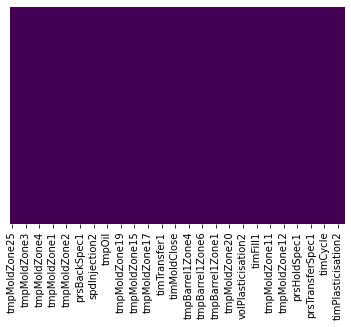

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
df.dtypes

tmpMoldZone25         float64
timCool1              float64
tmpBarrel2Zone3       float64
tmpMoldZone3          float64
tmpBarrel2Zone4       float64
                       ...   
timCycle              float64
frcClamp              float64
timPlasticisation1    float64
timPlasticisation2    float64
reason                  int32
Length: 74, dtype: object

In [11]:
df['reason'].value_counts()

0    36329
1     7053
Name: reason, dtype: int64

<AxesSubplot:xlabel='reason', ylabel='count'>

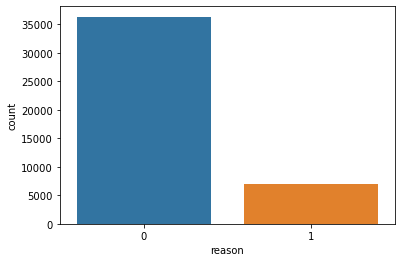

In [12]:
sns.countplot(x='reason',data=df)

<AxesSubplot:>

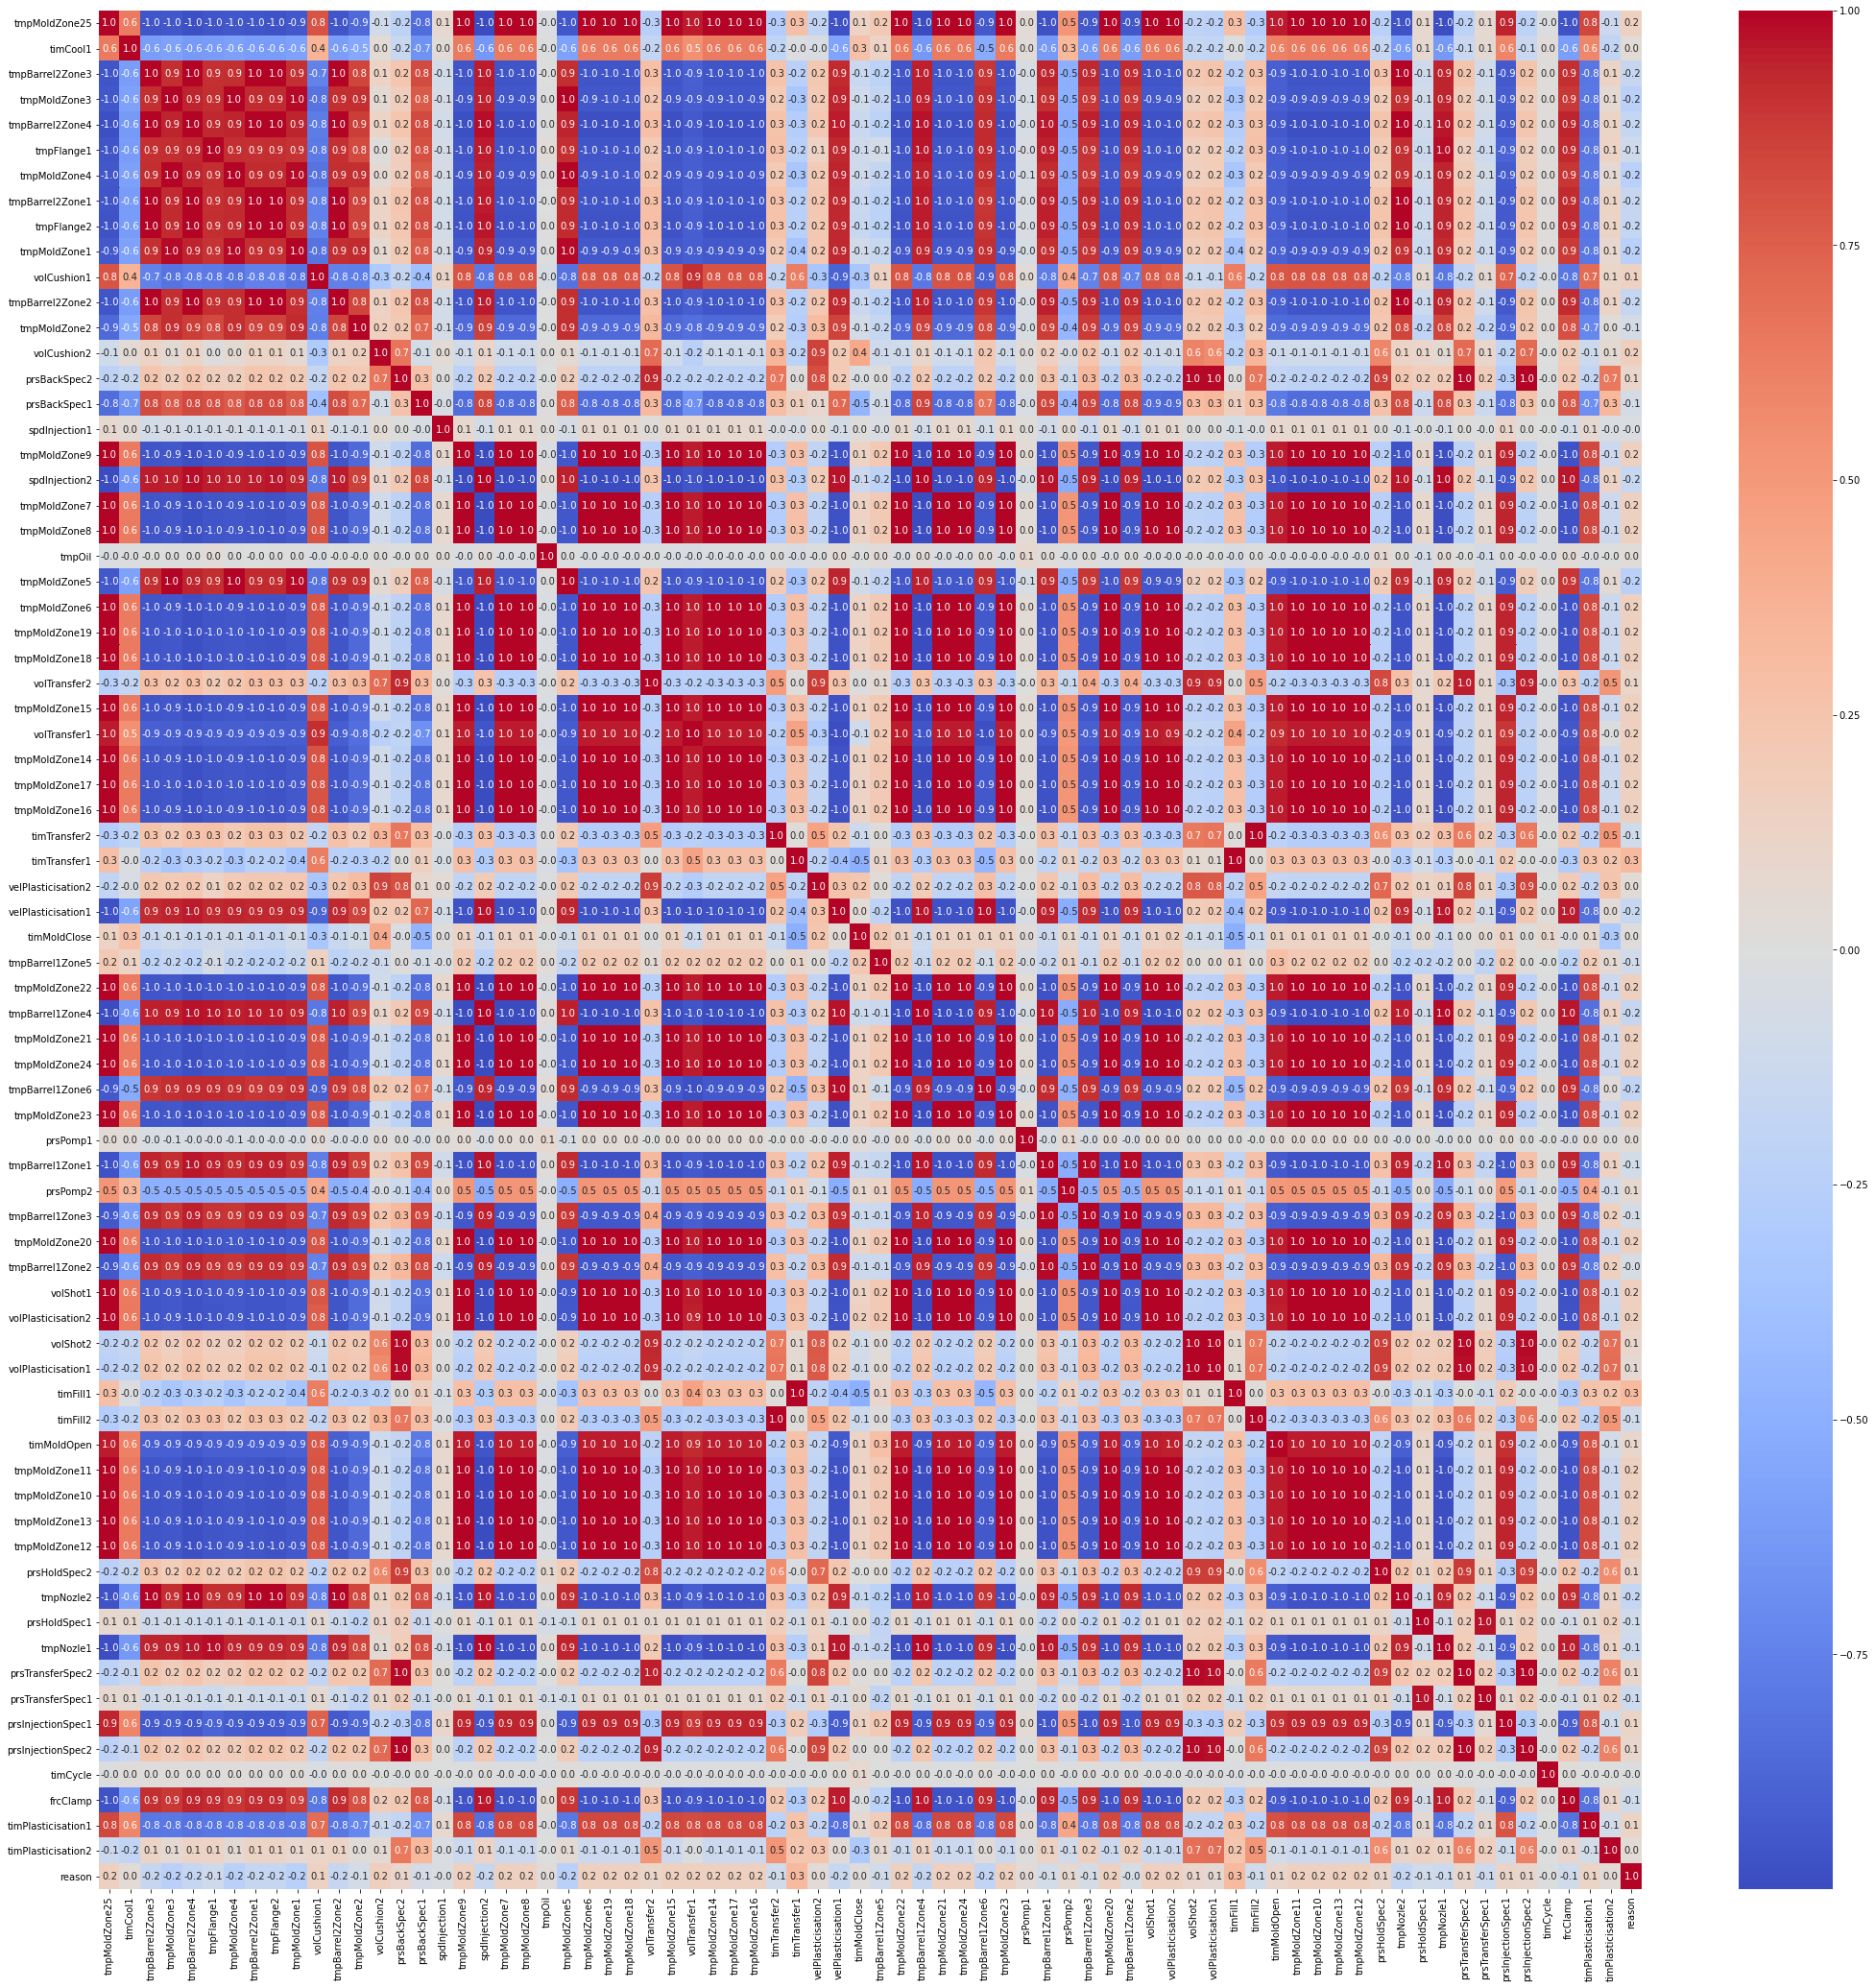

In [51]:
fig, ax = plt.subplots(figsize=(36,36))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm', fmt='.1f')

In [13]:
df.columns

Index(['tmpMoldZone25', 'timCool1', 'tmpBarrel2Zone3', 'tmpMoldZone3',
       'tmpBarrel2Zone4', 'tmpFlange1', 'tmpMoldZone4', 'tmpBarrel2Zone1',
       'tmpFlange2', 'tmpMoldZone1', 'volCushion1', 'tmpBarrel2Zone2',
       'tmpMoldZone2', 'volCushion2', 'prsBackSpec2', 'prsBackSpec1',
       'spdInjection1', 'tmpMoldZone9', 'spdInjection2', 'tmpMoldZone7',
       'tmpMoldZone8', 'tmpOil', 'tmpMoldZone5', 'tmpMoldZone6',
       'tmpMoldZone19', 'tmpMoldZone18', 'volTransfer2', 'tmpMoldZone15',
       'volTransfer1', 'tmpMoldZone14', 'tmpMoldZone17', 'tmpMoldZone16',
       'timTransfer2', 'timTransfer1', 'velPlasticisation2',
       'velPlasticisation1', 'timMoldClose', 'tmpBarrel1Zone5',
       'tmpMoldZone22', 'tmpBarrel1Zone4', 'tmpMoldZone21', 'tmpMoldZone24',
       'tmpBarrel1Zone6', 'tmpMoldZone23', 'prsPomp1', 'tmpBarrel1Zone1',
       'prsPomp2', 'tmpBarrel1Zone3', 'tmpMoldZone20', 'tmpBarrel1Zone2',
       'volShot1', 'volPlasticisation2', 'volShot2', 'volPlasticisation1',
  

In [14]:
df.timPlasticisation1

0         7.24
1         6.17
2         6.17
3         6.09
4         6.18
         ...  
43377    22.66
43378    22.67
43379    22.75
43380    23.08
43381    23.14
Name: timPlasticisation1, Length: 43382, dtype: float64

In [15]:
#Class count
count_class_0, count_class_1 = df.reason.value_counts()
#Divide by class
df_class_0 = df[df['reason'] == 0]
df_class_1 = df[df['reason'] == 1]

## Random Under-Sampling

In [16]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
print('Random under-sampling:')
print(df_test_under.reason.value_counts())

Random under-sampling:
1    7053
0    7053
Name: reason, dtype: int64


<AxesSubplot:>

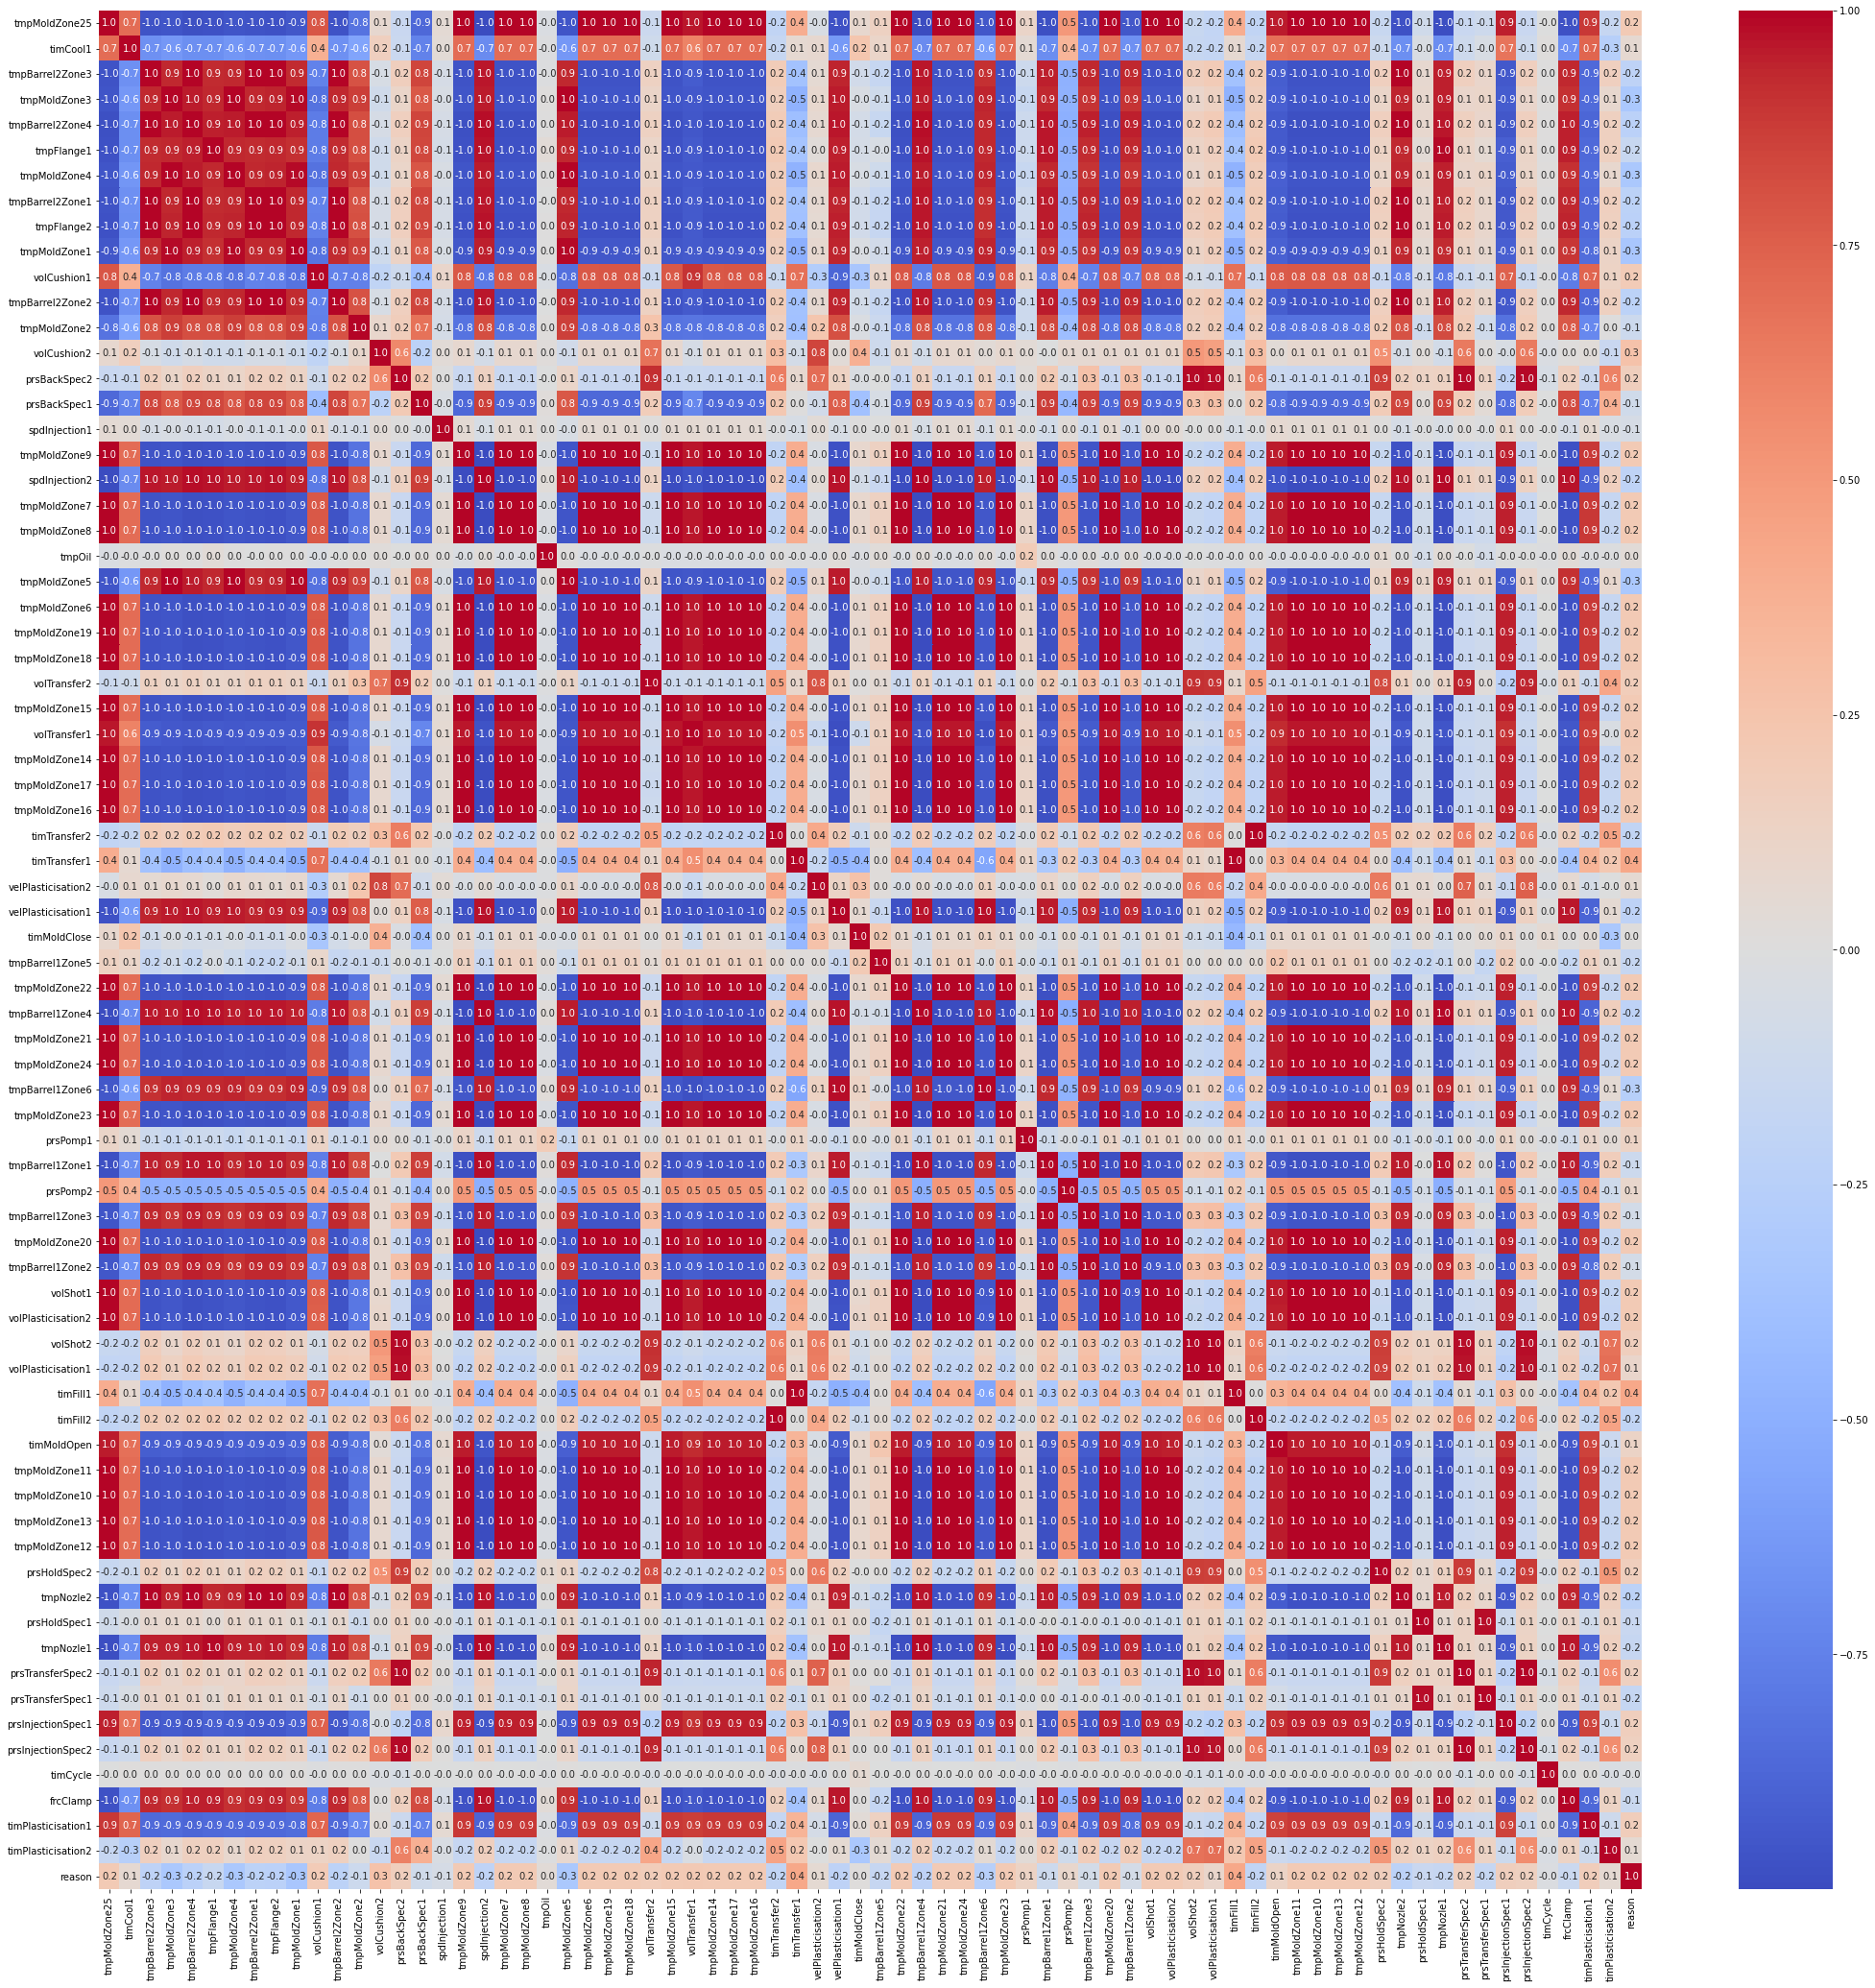

In [17]:
fig, ax = plt.subplots(figsize=(36,36))
sns.heatmap(df_test_under.corr(),annot=True,cmap='coolwarm', fmt='.1f')

In [23]:
df1 = df_test_under[df_test_under.reason==1]
df0 = df_test_under[df_test_under.reason==0]

## Prepare validation data

In [24]:
df_test = pd.concat([df1[:500] , df0[:500]], join="inner")
df_train = pd.concat([df1[500:] , df0[500:]], join="inner")

In [25]:
y = df_train['reason']
X = df_train.drop(['reason'], axis=1)

## Normalization

In [26]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,-1.079842,-0.263426,1.031900,1.134960,1.086596,0.952117,1.124913,1.012963,1.015454,1.130977,...,0.280614,1.072978,0.164412,0.333510,-0.925750,0.178784,0.002734,0.996367,-1.034752,-0.547558
1,-1.079908,-0.262092,1.030792,1.130307,1.086596,1.101949,1.124913,1.012963,1.015454,1.135660,...,0.319034,1.004164,0.161297,0.286362,-0.951482,0.178089,0.002812,0.986454,-1.037976,-0.536647
2,-1.079842,-0.263426,1.030792,1.134960,1.087702,1.031440,1.124913,1.012963,1.026189,1.130977,...,0.261953,1.004164,0.168912,0.314651,-0.936043,0.178784,0.002655,0.985955,-1.036902,-0.540284
3,-1.079842,-0.260758,1.031900,1.130307,1.087702,1.101949,1.124913,1.012963,1.018675,1.130977,...,0.187308,1.062391,0.175488,0.241309,-0.976071,0.181562,0.001711,0.974857,-1.035827,-0.529373
4,-1.079908,-0.263426,1.029683,1.130307,1.085491,1.066695,1.124913,1.014046,1.012234,1.130977,...,0.239998,1.094152,0.169604,0.292648,-0.948051,0.172185,0.002655,0.997614,-1.032602,-0.529373


## Prepare train and test data

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

## Logistic Regression

Confusion Matrix:
 [[1199   95]
 [  83 1245]]
Accuracy:
 0.9321128909229596
Precision:
 0.9291044776119403
Recall:
 0.9375
AUC:
 0.9839289538369863


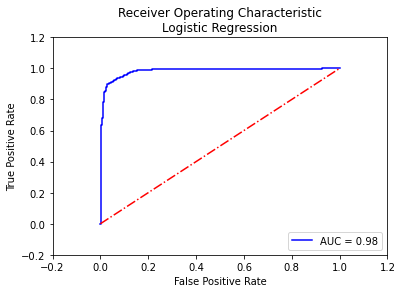

In [28]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_logreg=logreg.predict(X_val)
y_logreg_prob=logreg.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_logreg))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_logreg))
print("Precision:\n",metrics.precision_score(y_val,y_logreg))
print("Recall:\n",metrics.recall_score(y_val,y_logreg))
print("AUC:\n",metrics.roc_auc_score(y_val,y_logreg_prob))
auc=metrics.roc_auc_score(y_val,y_logreg_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_logreg_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Test and Evaluation

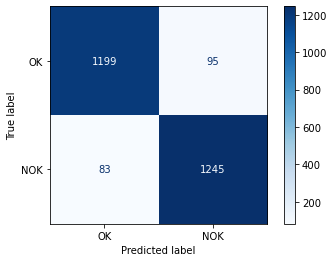

In [29]:
cm = metrics.confusion_matrix(y_val,y_logreg)
classNames = ['OK','NOK']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot(cmap=plt.cm.Blues)

In [30]:
y_test = df_test['reason']
X_test = df_test.drop(['reason'], axis=1)

In [31]:
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,-1.073244,-1.063798,1.030792,0.650978,0.977145,0.969744,0.662374,1.015130,1.017601,0.634584,...,0.268539,1.136499,0.140182,0.205686,-0.976643,0.129816,-0.042344,0.991130,-0.907917,0.762925
1,-1.073244,-1.066466,1.030792,0.650978,0.978251,1.101949,0.657748,1.014046,1.005794,0.634584,...,0.223532,1.094152,0.141567,0.205686,-0.976071,0.130857,-0.042580,1.009523,-0.908992,0.759288
2,-1.073244,-1.146503,1.030792,0.650978,0.974934,1.119577,0.662374,1.014046,1.013307,0.634584,...,0.196090,1.136499,0.142951,0.192066,-0.973783,0.130510,-0.041557,0.981653,-0.907917,0.728981
3,-1.073244,-1.139833,1.031900,0.650978,0.974934,1.101949,0.662374,1.014046,1.016528,0.634584,...,0.221337,0.967110,0.134644,0.200448,-0.970352,0.131899,-0.041007,0.977974,-0.911142,0.733830
4,0.927106,0.612981,-0.236231,-0.940580,-0.432454,-0.722482,-0.942636,-0.279113,-0.504507,-1.060643,...,-13.197146,-0.827347,0.138798,3.579388,1.278654,0.131899,-0.661317,-0.811501,1.722296,0.743528


Confusion Matrix:
 [[456  44]
 [ 12 488]]
Accuracy:
 0.944
Precision:
 0.9172932330827067
Recall:
 0.976
AUC:
 0.989124


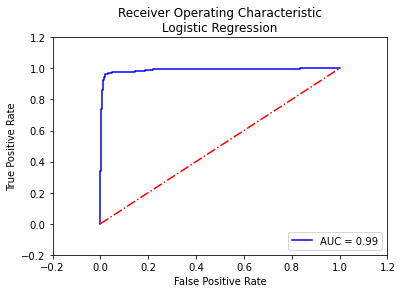

In [32]:
y_logreg_val=logreg.predict(X_test)
y_logreg_prob_val=logreg.predict_proba(X_test)[:,1]
#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_logreg_val))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_logreg_val))
print("Precision:\n",metrics.precision_score(y_test,y_logreg_val))
print("Recall:\n",metrics.recall_score(y_test,y_logreg_val))
print("AUC:\n",metrics.roc_auc_score(y_test,y_logreg_prob_val))
auc=metrics.roc_auc_score(y_test,y_logreg_prob_val)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_logreg_prob_val)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Hyper-parameter tuning

In [45]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [46]:
grid_log_reg = GridSearchCV(logreg, log_reg_params)

In [47]:
grid_log_reg.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

Confusion Matrix:
 [[1201   93]
 [  79 1249]]
Accuracy:
 0.9344012204424104
Precision:
 0.9307004470938898
Recall:
 0.9405120481927711
AUC:
 0.9853895877171748


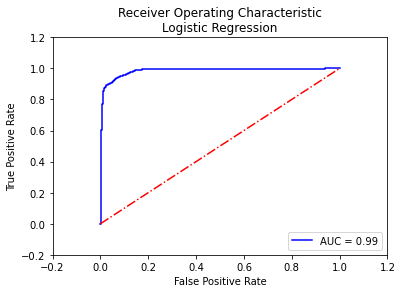

In [48]:
tuned_log = grid_log_reg.predict(X_val)
tuned_log_prob = grid_log_reg.predict_proba(X_val)[:,1]
#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,tuned_log))
print("Accuracy:\n",metrics.accuracy_score(y_val,tuned_log))
print("Precision:\n",metrics.precision_score(y_val,tuned_log))
print("Recall:\n",metrics.recall_score(y_val,tuned_log))
print("AUC:\n",metrics.roc_auc_score(y_val,tuned_log_prob))
auc=metrics.roc_auc_score(y_val,tuned_log_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,tuned_log_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion Matrix:
 [[460  40]
 [  9 491]]
Accuracy:
 0.951
Precision:
 0.9246704331450094
Recall:
 0.982
AUC:
 0.991524


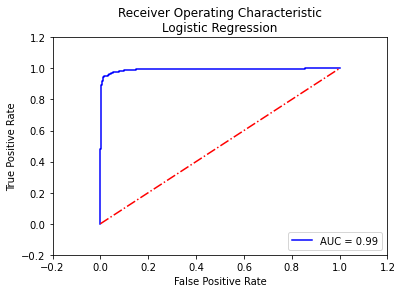

In [49]:
tuned_log_val = grid_log_reg.predict(X_test)
tuned_log_prob_val = grid_log_reg.predict_proba(X_test)[:,1]
#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,tuned_log_val))
print("Accuracy:\n",metrics.accuracy_score(y_test,tuned_log_val))
print("Precision:\n",metrics.precision_score(y_test,tuned_log_val))
print("Recall:\n",metrics.recall_score(y_test,tuned_log_val))
print("AUC:\n",metrics.roc_auc_score(y_test,tuned_log_prob_val))
auc=metrics.roc_auc_score(y_test,tuned_log_prob_val)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,tuned_log_prob_val)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

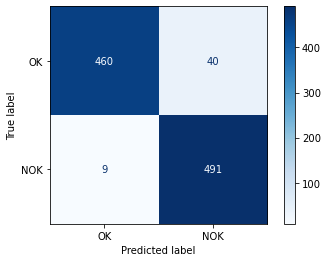

In [50]:
cm = metrics.confusion_matrix(y_test,tuned_log_val)
classNames = ['OK','NOK']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot(cmap=plt.cm.Blues)

## Random Forest Classification

Confusion Matrix:
 [[1248   46]
 [  67 1261]]
Accuracy:
 0.9569031273836766
Precision:
 0.964804896710023
Recall:
 0.9495481927710844
AUC:
 0.994312838680844


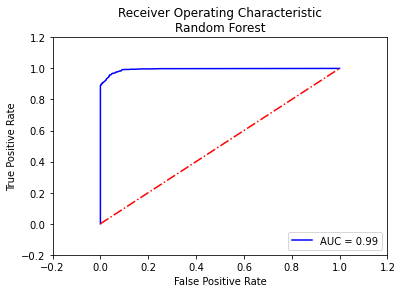

In [33]:
#Random Forest with 'entropy' criterion
from sklearn.ensemble import RandomForestClassifier

rf2=RandomForestClassifier(criterion='entropy',random_state=3)
rf2.fit(X_train,y_train)
y_rf2=rf2.predict(X_val)
y_rf_prob2=rf2.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_rf2))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_rf2))
print("Precision:\n",metrics.precision_score(y_val,y_rf2))
print("Recall:\n",metrics.recall_score(y_val,y_rf2))
print("AUC:\n",metrics.roc_auc_score(y_val,y_rf_prob2))
auc=metrics.roc_auc_score(y_val,y_rf_prob2)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_rf_prob2)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Test and Validation

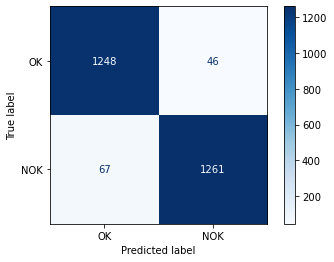

In [34]:
cm = metrics.confusion_matrix(y_val,y_rf2)
classNames = ['OK','NOK']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot(cmap=plt.cm.Blues)

Confusion Matrix:
 [[485  15]
 [ 10 490]]
Accuracy:
 0.975
Precision:
 0.9702970297029703
Recall:
 0.98
AUC:
 0.997568


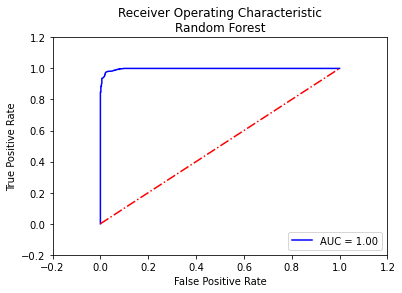

In [35]:
y_rf2_val=rf2.predict(X_test)
y_rf_prob2_val=rf2.predict_proba(X_test)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_rf2_val))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_rf2_val))
print("Precision:\n",metrics.precision_score(y_test,y_rf2_val))
print("Recall:\n",metrics.recall_score(y_test,y_rf2_val))
print("AUC:\n",metrics.roc_auc_score(y_test,y_rf_prob2_val))
auc=metrics.roc_auc_score(y_test,y_rf_prob2_val)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_rf_prob2_val)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [36]:
threshold = 0.05
y_rf_prob2_val = rf2.predict_proba(X_test)[:,1]
prob_thresh = (y_rf_prob2_val>=threshold).astype('int')
CM_2_Thresh = confusion_matrix(y_test,prob_thresh)
print("Confusion Matrix:\n", CM_2_Thresh)
print("Accuracy:\n",metrics.accuracy_score(y_test,prob_thresh))
print("Precision:\n",metrics.precision_score(y_test,prob_thresh))
print("Recall:\n",metrics.recall_score(y_test,prob_thresh))
print("AUC:\n",metrics.roc_auc_score(y_test,prob_thresh))

Confusion Matrix:
 [[408  92]
 [  0 500]]
Accuracy:
 0.908
Precision:
 0.8445945945945946
Recall:
 1.0
AUC:
 0.908


Confusion Matrix:
 [[1247   47]
 [  67 1261]]
Accuracy:
 0.9565217391304348
Precision:
 0.9640672782874617
Recall:
 0.9495481927710844
AUC:
 0.9946218413064933


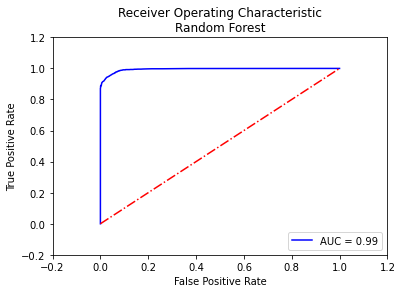

In [37]:
#Random Forest with 'gini' criterion
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=3)
rf.fit(X_train,y_train)
y_rf=rf.predict(X_val)
y_rf_prob=rf.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_rf))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_rf))
print("Precision:\n",metrics.precision_score(y_val,y_rf))
print("Recall:\n",metrics.recall_score(y_val,y_rf))
print("AUC:\n",metrics.roc_auc_score(y_val,y_rf_prob))
auc=metrics.roc_auc_score(y_val,y_rf_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

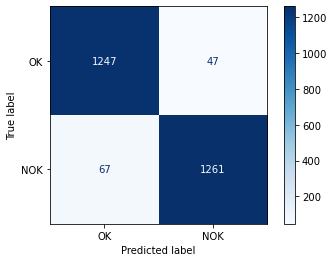

In [38]:
cm = metrics.confusion_matrix(y_val,y_rf)
classNames = ['OK','NOK']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot(cmap=plt.cm.Blues)

Confusion Matrix:
 [[479  21]
 [ 11 489]]
Accuracy:
 0.968
Precision:
 0.9588235294117647
Recall:
 0.978
AUC:
 0.998032


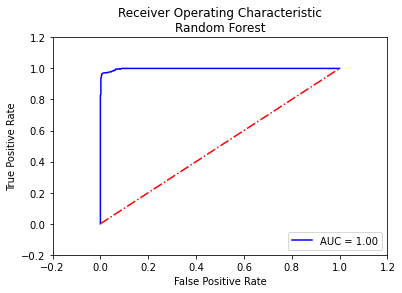

In [39]:
y_rf_val=rf.predict(X_test)
y_rf_prob_val=rf.predict_proba(X_test)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_rf_val))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_rf_val))
print("Precision:\n",metrics.precision_score(y_test,y_rf_val))
print("Recall:\n",metrics.recall_score(y_test,y_rf_val))
print("AUC:\n",metrics.roc_auc_score(y_test,y_rf_prob_val))
auc=metrics.roc_auc_score(y_test,y_rf_prob_val)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_rf_prob_val)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [40]:
threshold = 0.05
y_rf_prob_val = rf.predict_proba(X_test)[:,1]
prob_thresh = (y_rf_prob_val>=threshold).astype('int')
CM_2_Thresh = confusion_matrix(y_test,prob_thresh)
print("Confusion Matrix:\n", CM_2_Thresh)
print("Accuracy:\n",metrics.accuracy_score(y_test,prob_thresh))
print("Precision:\n",metrics.precision_score(y_test,prob_thresh))
print("Recall:\n",metrics.recall_score(y_test,prob_thresh))
print("AUC:\n",metrics.roc_auc_score(y_test,prob_thresh))

Confusion Matrix:
 [[408  92]
 [  0 500]]
Accuracy:
 0.908
Precision:
 0.8445945945945946
Recall:
 1.0
AUC:
 0.908


Confusion Matrix:
 [[1190  104]
 [  72 1256]]
Accuracy:
 0.9328756674294432
Precision:
 0.9235294117647059
Recall:
 0.9457831325301205
AUC:
 0.981920436770265


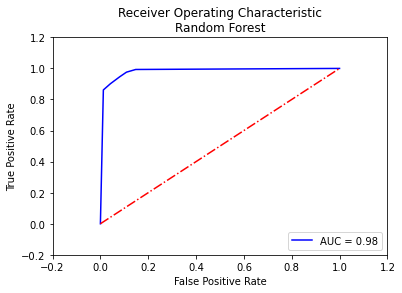

In [42]:
knc=KNeighborsClassifier()
knc.fit(X_train,y_train)
y_knc=knc.predict(X_val)
y_knc_prob2=knc.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_knc))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_knc))
print("Precision:\n",metrics.precision_score(y_val,y_knc))
print("Recall:\n",metrics.recall_score(y_val,y_knc))
print("AUC:\n",metrics.roc_auc_score(y_val,y_knc_prob2))
auc=metrics.roc_auc_score(y_val,y_knc_prob2)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_knc_prob2)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

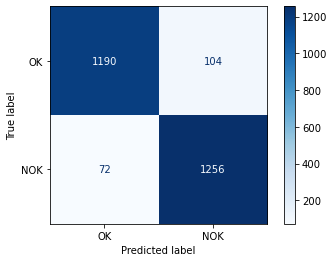

In [43]:
cm = metrics.confusion_matrix(y_val,y_knc)
classNames = ['OK','NOK']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot(cmap=plt.cm.Blues)

Confusion Matrix:
 [[472  28]
 [ 31 469]]
Accuracy:
 0.941
Precision:
 0.9436619718309859
Recall:
 0.938
AUC:
 0.983084


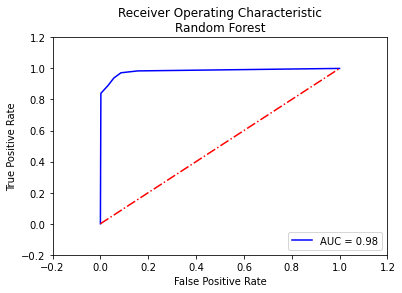

In [44]:
y_knc_val=knc.predict(X_test)
y_knc_prob2_val=knc.predict_proba(X_test)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_knc_val))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_knc_val))
print("Precision:\n",metrics.precision_score(y_test,y_knc_val))
print("Recall:\n",metrics.recall_score(y_test,y_knc_val))
print("AUC:\n",metrics.roc_auc_score(y_test,y_knc_prob2_val))
auc=metrics.roc_auc_score(y_test,y_knc_prob2_val)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_knc_prob2_val)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()